# Basic Statistical Analysis of the Data


## Vmin: Temperature, Process and Libraries

Explore correlations between parameters involved in the evaluation of Vmin using boxplots and correlation matrices to visualize relationships within the data.

In [2]:
!git clone https://github.com/shakedzy/dython
!pip install ./dython

import pandas as pd
from dython import nominal
import numpy as np
import random
import time
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
from matplotlib import pyplot as plt

fatal: destination path 'dython' already exists and is not an empty directory.
Processing ./dython
  Stored in directory: /tmp/pip-ephem-wheel-cache-6nsssh63/wheels/2e/0c/35/82dcbec1fea3c9f3a8ae495a32e1b7e6e4047566833e578081
Successfully built dython
  Found existing installation: dython 0.1.1
    Uninstalling dython-0.1.1:
      Successfully uninstalled dython-0.1.1


   File Index Chip Type  Chip Temp  Test Number                 Test Item  \
0         101        TT        -40          600  sc7p5mcpp96p_sfk_lvt_c16   
1         101        TT        -40          624  sc7p5mcpp96p_sfk_lvt_c16   
2         101        TT        -40          648  sc7p5mcpp96p_sfk_lvt_c16   
3         101        TT        -40          672  sc7p5mcpp96p_sfk_lvt_c16   
4         101        TT        -40          696  sc7p5mcpp96p_sfk_lvt_c16   

   VDD (V)  DVDD (V) Period (Range) Result  Shmoo Value  
0    0.495       0.9      100.00 ns    (P)         -9.9  
1    0.540       1.2      100.00 ns    (P)         -9.9  
2    0.630       1.2      100.00 ns    (P)         -9.9  
3    0.675       1.2      100.00 ns    (P)         -9.9  
4    0.720       1.2      100.00 ns    (P)         -9.9  


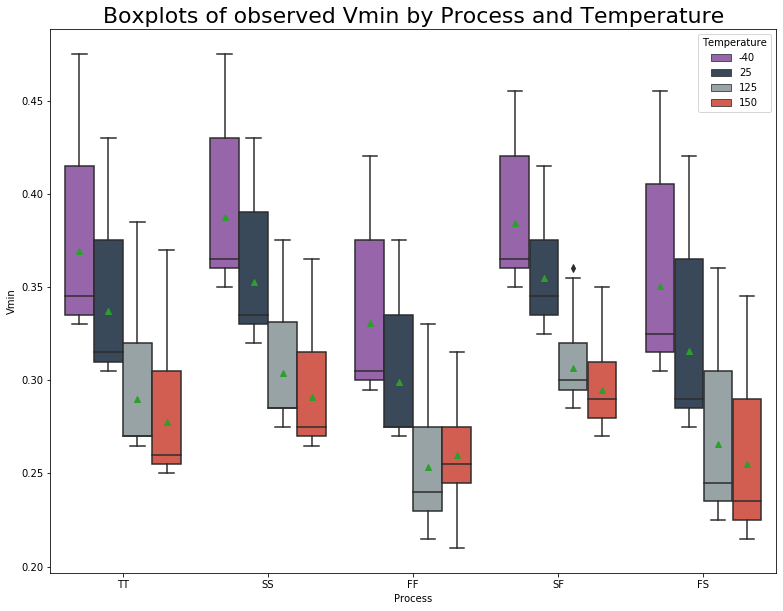

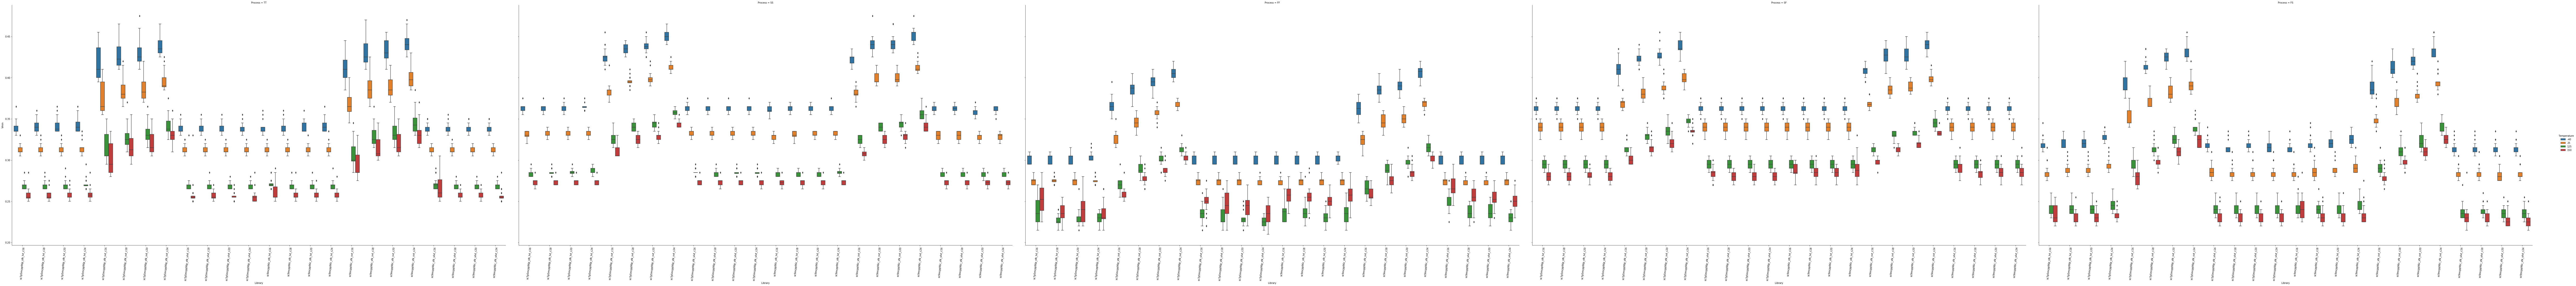

In [6]:
# open csv data
data = pd.read_csv("sortedVminStd.csv")
print(data.head())

# used to create sub-dataframes
temperatureList = []
vminList = []
processList = []
libraryList = []
for i in range(len(data)): # iterate through csv to pick required data
  if data['Shmoo Value'][i] != -9.9:
    temperatureList.append(data['Chip Temp'][i])
    vminList.append(data['Shmoo Value'][i])
    processList.append(data['Chip Type'][i])
    libraryList.append(data['Test Item'][i])

# First Datatict does not include the library data 
dataDict = {'Library':libraryList, 'Vmin':vminList , 'Temperature':temperatureList, 'Process':processList} 
df = pd.DataFrame(dataDict)

#print(df.head()) # (for debugging purposes)

# boxplot -> process comparison
flatui = ["#9b59b6", "#34495e", "#95a5a6", "#e74c3c"]
plt.figure(figsize=(13,10))
sns.boxplot(x='Process', y='Vmin', data=df, hue='Temperature', showmeans=True, palette = flatui)
plt.title('Boxplots of observed Vmin by Process and Temperature', fontsize=22)
plt.show()

# boxplot -> library comparison
g = sns.catplot(x='Library', y='Vmin', data=df, col="Process", height = 15, aspect = 2, hue = 'Temperature', kind='box')
g.set_xticklabels(rotation=85)

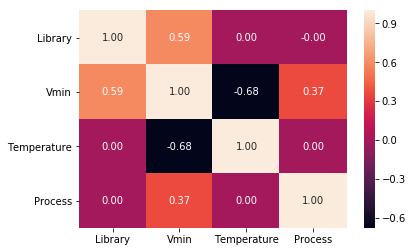

In [8]:
nominal.associations(df, nominal_columns=['Process','Library'], theil_u= True)

## Leakage: Temperature, Process, and Leakage Test Type

Similar to what was done previously for Vmin, the aim is to uncover relationships to be further investigated later.

  Chip Type  Chip Temp Leakage Test Type    Pin  Value (uA)
0        TT        -40              high   AA_0       0.012
1        TT        -40              high   AA_1       0.006
2        TT        -40              high  AA_10       0.006
3        TT        -40              high  AA_11       0.000
4        TT        -40              high  AA_12       0.000


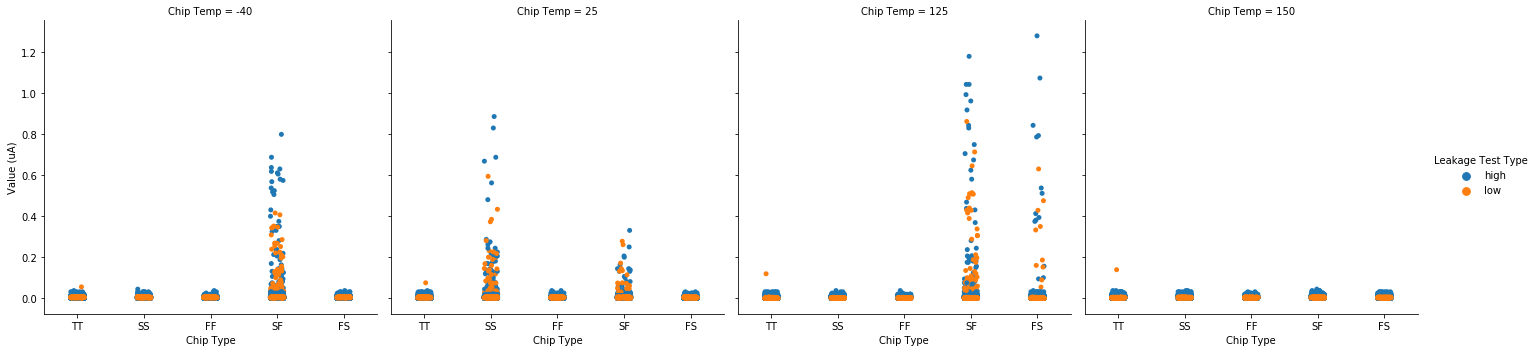

In [6]:
data2 = pd.read_csv('sortedLeakage.csv')
df2 = data2.copy()
del df2['File Index']
del df2['DVDD (Range)']
del df2['Period (Range)']
del df2['VDD (Range)']
print(df2.head())

# scatter plot
h = sns.catplot(x="Chip Type", y="Value (uA)", data=df2, col = 'Chip Temp', hue = 'Leakage Test Type')

SOMETHING IS WRONG WITH THE CORRELATION MATRIX...

     Pin  Value (uA)  Chip Type_FF  ...  Chip Temp_25  Chip Temp_125  Chip Temp_150
0   AA_0       0.012             0  ...             0              0              0
1   AA_1       0.006             0  ...             0              0              0
2  AA_10       0.006             0  ...             0              0              0
3  AA_11       0.000             0  ...             0              0              0
4  AA_12       0.000             0  ...             0              0              0

[5 rows x 13 columns]
Index(['Pin', 'Value (uA)', 'Chip Type_FF', 'Chip Type_FS', 'Chip Type_SF',
       'Chip Type_SS', 'Chip Type_TT', 'Leakage Test Type_high',
       'Leakage Test Type_low', 'Chip Temp_-40', 'Chip Temp_25',
       'Chip Temp_125', 'Chip Temp_150'],
      dtype='object')
     Pin  Value (uA)  Chip Type_FF  ...  Chip Temp_25  Chip Temp_125  Chip Temp_150
0   AA_0       0.012             0  ...             0              0              0
1   AA_1       0.006             0 

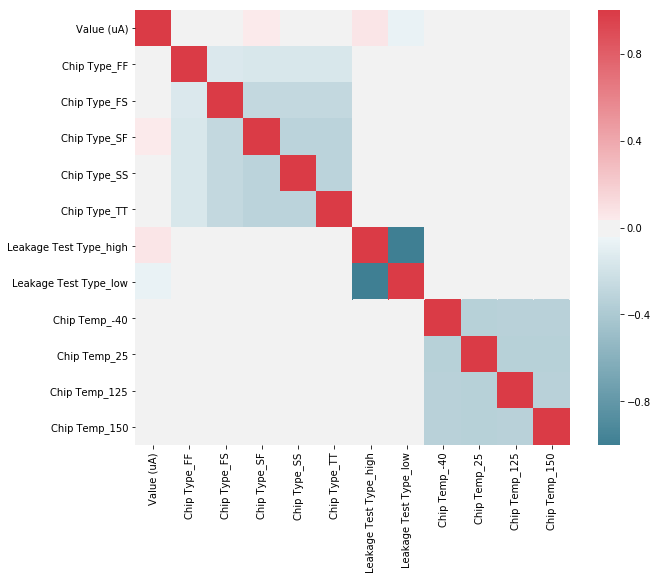

In [21]:
df3 = df2.copy()


df3 = pd.concat([df3,pd.get_dummies(df3['Chip Type'], prefix='Chip Type')],axis=1)
df3.drop(['Chip Type'],axis=1, inplace=True)

df3 = pd.concat([df3,pd.get_dummies(df3['Leakage Test Type'], prefix='Leakage Test Type')],axis=1)
df3.drop(['Leakage Test Type'],axis=1, inplace=True)

df3 = pd.concat([df3,pd.get_dummies(df3['Chip Temp'], prefix='Chip Temp')],axis=1)
df3.drop(['Chip Temp'],axis=1, inplace=True)

print(df3.head())
print(df3.columns)


print(df3.head())
f, ax = plt.subplots(figsize=(10, 8))
corr = df3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)